# Market segmentation

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
sm_marketing = pd.read_csv('social_marketing.csv')
sm_marketing.set_index('Unnamed: 0',inplace=True)
sm_marketing[:5]

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
hmjoe4g3k,2,0,2,2,2,1,1,0,4,1,...,1,0,1,1,0,11,0,0,0,0
clk1m5w8s,3,3,2,1,1,1,4,1,2,2,...,0,0,0,1,4,0,0,0,0,0
jcsovtak3,6,3,4,3,1,5,0,2,1,1,...,0,1,0,1,0,0,1,0,0,0
3oeb4hiln,1,5,2,2,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
fd75x1vgk,5,2,0,6,1,0,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0


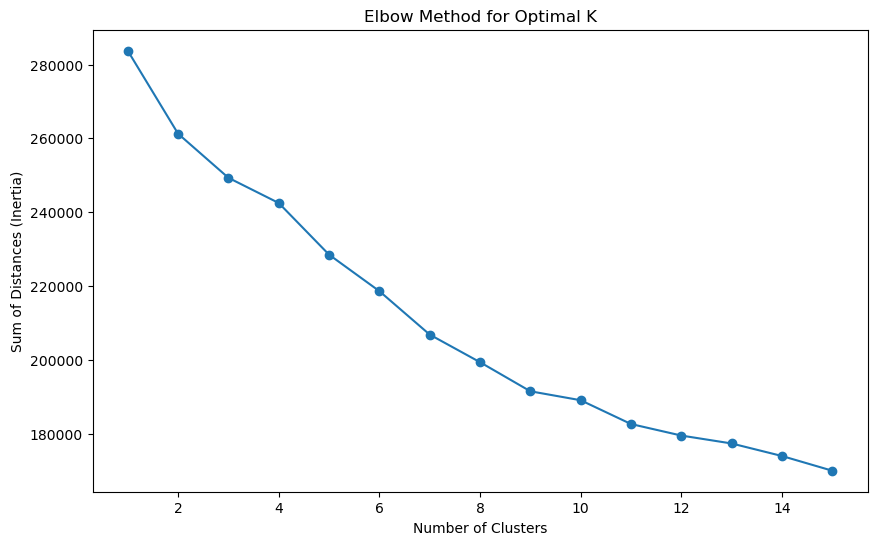

Cluster Summary:
           chatter  current_events    travel  photo_sharing  uncategorized  \
Cluster                                                                     
0        4.761905        1.660714  1.869048       2.404762       1.071429   
1        4.454681        1.656761  5.690936       2.505201       0.775632   
2        4.226636        1.497664  1.518692       2.778037       0.899533   
3        3.980816        1.409101  1.074727       2.076734       0.700870   
4        4.124834        1.666667  1.337317       2.588313       0.739708   
5        5.891068        1.759622  1.360930       4.878722       1.177923   

          tv_film  sports_fandom  politics      food    family  ...  religion  \
Cluster                                                         ...             
0        0.982143       1.678571  1.595238  1.410714  0.970238  ...  1.035714   
1        1.170877       2.060921  9.106984  1.454681  0.915305  ...  1.052006   
2        1.626168       1.336449  1.29439

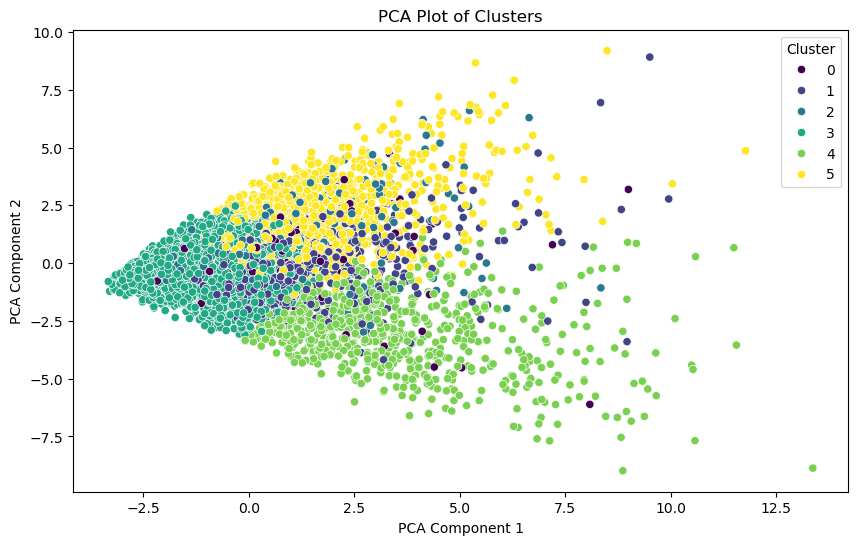

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Load the dataset
sm_marketing = pd.read_csv('social_marketing.csv')
sm_marketing.set_index('Unnamed: 0', inplace=True)

# Step 2: Data normalization (Standardization)
scaler = StandardScaler()
marketing_scaled = scaler.fit_transform(sm_marketing)

# Step 3: K-Means Clustering
# Use the elbow method to find the optimal number of clusters
sum_of_distances = {}
for num_clusters in range(1, 16):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(marketing_scaled)
    sum_of_distances[num_clusters] = kmeans.inertia_

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(list(sum_of_distances.keys()), list(sum_of_distances.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Distances (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 4: Fit K-Means with the chosen number of clusters
optimal_clusters = 6  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=1)
sm_marketing['Cluster'] = kmeans.fit_predict(marketing_scaled)

# Step 5: Analyze the clusters
cluster_summary = sm_marketing.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# Step 6: Visualize the clusters using PCA
pca = PCA(n_components=2)
marketing_pca = pca.fit_transform(marketing_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=marketing_pca[:, 0], y=marketing_pca[:, 1], hue=sm_marketing['Cluster'], palette='viridis', marker='o')
plt.title('PCA Plot of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 5: Analyze the clusters and find the top features for each cluster
# Group by cluster and calculate the mean of each feature
cluster_summary = sm_marketing.groupby('Cluster').mean()

In [7]:
# Find the top 3 features for each cluster
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} - Top Features:")
    top_features = cluster_summary.loc[cluster].sort_values(ascending=False).head(3)
    for feature, value in top_features.items():
        print(f"  Feature: {feature}, Value: {value:.2f}")


Cluster 0 - Top Features:
  Feature: adult, Value: 10.03
  Feature: chatter, Value: 4.76
  Feature: photo_sharing, Value: 2.40

Cluster 1 - Top Features:
  Feature: politics, Value: 9.11
  Feature: travel, Value: 5.69
  Feature: news, Value: 5.39

Cluster 2 - Top Features:
  Feature: college_uni, Value: 10.62
  Feature: online_gaming, Value: 9.83
  Feature: chatter, Value: 4.23

Cluster 3 - Top Features:
  Feature: chatter, Value: 3.98
  Feature: photo_sharing, Value: 2.08
  Feature: current_events, Value: 1.41

Cluster 4 - Top Features:
  Feature: sports_fandom, Value: 5.91
  Feature: religion, Value: 5.30
  Feature: food, Value: 4.61

Cluster 5 - Top Features:
  Feature: health_nutrition, Value: 7.22
  Feature: cooking, Value: 6.10
  Feature: chatter, Value: 5.89


### Result of Clustering
Cluster 0 - Top Features: adult, chatter, photo_sharing

Cluster 1 - Top Features: politics, travel, news

Cluster 2 - Top Features: college_uni, online_gaming, chatter

Cluster 3 - Top Features: chatter, photo_sharing, current_events

Cluster 4 - Top Features: sports_fandom, religion, food

Cluster 5 - Top Features: health_nutrition, cooking, chatter

There clusters are representation of people of different interests.

### Using Latent Factor analysis and then clustering

         Factor_1  Factor_2  Factor_3  Factor_4  Factor_5
Cluster                                                  
0       -0.372242 -0.538568 -0.078290 -0.187470 -0.014334
1       -0.222898  0.185621 -0.078917  0.711883  1.456248
2        2.563178 -0.773199 -0.260604 -0.329007  0.059864
3        0.047152  0.238633 -0.059165  1.827633 -1.435875
4        0.497268  1.701938  3.660243 -0.790034 -0.244933
5       -0.049989  1.502962 -1.135217 -0.883341 -0.306994
6       -0.101464  0.315876  1.381602 -0.407895 -0.125046
7        0.289854  1.317704 -0.150582  1.942635  3.118653


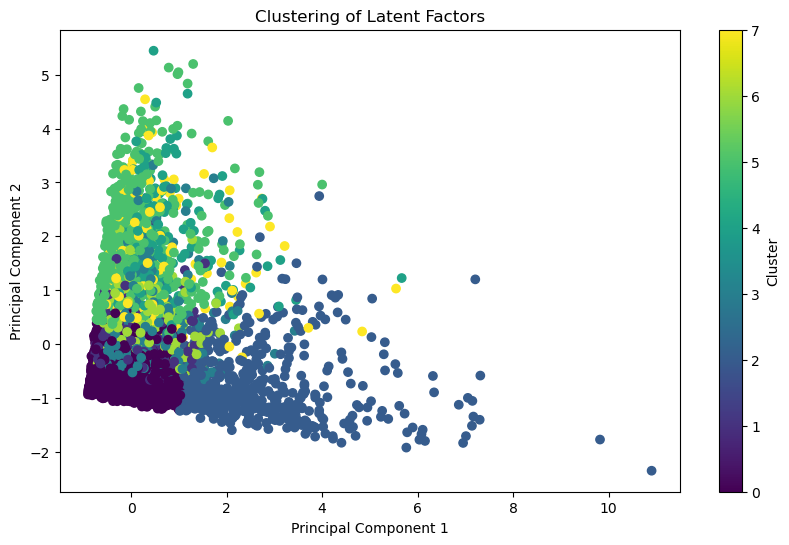

Factor Loadings:
     chatter  current_events    travel  photo_sharing  uncategorized   tv_film  \
0  0.080877        0.097554  0.677595       0.098413       0.042618  0.083593   
1  0.051545        0.059269 -0.103457       0.196201       0.170501  0.100865   
2  0.019586        0.003167 -0.017708       0.015209       0.031013  0.162786   
3  0.059100        0.079775 -0.054040       0.218817       0.054945  0.013621   
4  0.057136        0.012228  0.050220       0.323939       0.115261 -0.020010   

   sports_fandom  politics      food    family  ...  religion    beauty  \
0       0.178417  0.933055  0.186082  0.139859  ...  0.154259  0.068686   
1       0.146866 -0.188856  0.339046  0.171147  ...  0.186243  0.278604   
2       0.008258 -0.081455 -0.083337  0.038496  ... -0.000443 -0.020272   
3       0.589209 -0.091792  0.435825  0.415947  ...  0.638528  0.508129   
4      -0.454459  0.040128 -0.438829 -0.282532  ... -0.465645  0.519761   

   parenting    dating    school  personal_f

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your marketing data
sm_marketing = pd.read_csv('social_marketing.csv')
sm_marketing.set_index('Unnamed: 0', inplace=True)

# Step 1: Standardize the data
scaler = StandardScaler()
marketing_scaled = scaler.fit_transform(sm_marketing)

# Step 2: Perform Factor Analysis to extract latent factors
n_factors = 5  # Choose the number of latent factors to extract
fa = FactorAnalysis(n_components=n_factors, random_state=10)
latent_factors = fa.fit_transform(marketing_scaled)

# Convert latent factors into a DataFrame for easier handling
factor_df = pd.DataFrame(latent_factors, columns=[f'Factor_{i+1}' for i in range(n_factors)])

# Step 3: Perform KMeans Clustering on the latent factors
n_clusters = 8  # You can choose the number of clusters based on the elbow method or silhouette score
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
factor_df['Cluster'] = kmeans.fit_predict(latent_factors)

# Step 4: Analyze the clusters
print(factor_df.groupby('Cluster').mean())

# Optional: Visualize the clustering
# Reduce to 2 dimensions using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_factors)

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=factor_df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering of Latent Factors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: View Factor Loadings
loadings = pd.DataFrame(fa.components_, columns=sm_marketing.columns)
print("Factor Loadings:\n", loadings)

for i in range(5):
    row = loadings.iloc[i, :]
    # Sort the features by their values in descending order
    top_features = row.sort_values(ascending=False).head(2)
    print(f"Cluster {i} - Top Features:")
    for feature, value in top_features.items():
        print(f"  Feature: {feature}, Value: {value:.2f}")
    print()  # Add a blank line for better readability


Using Factor Analysis and KMeans clustering, we sought to uncover latent patterns in the data and determine whether specific groups of users exhibit shared interests that can inform more targeted marketing strategies. We began by standardizing the data and applying Factor Analysis to uncover latent factors representing the underlying dimensions of user behavior. We identified five key latent factors:
Factor 1: Travel and tourism
Factor 2: Health_nutrition and personal_fitness
Factor 3: college_uni and online_gaming
Factor 4: Religion and parenting
Factor 5: Cooking and Fashion

Next, we performed KMeans clustering on the extracted factors to segment the audience into 8 distinct clusters. Each cluster represented a group of users with similar patterns of engagement, as revealed by their shared factor loadings.
Clusters based on factors labels
Cluster 0: No apparent features
Cluster 1: Religion, parenting, cooking, and fashion
Cluster 2: Travel and tourism
Cluster 3: Religion and parenting
Cluster 4: Health, fitness, college, and gaming
Cluster 5: Health and fitness
Cluster 6: College and gaming
Cluster 7: Health, fitness, religion, parenting, cooking, and fashion

The clustering analysis has revealed several distinct audience segments within NutrientH20's Twitter followers. These clusters are characterized by different combinations of interests.